In [1]:
from NeuralNetwork import Perceptron, ANN, Activation, Loss, train_test_val_split, create_mini_batches
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# innitialize the dataset for each gate

X_gate = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_gate = np.array([0, 0, 0, 1])
y_or_gate = np.array([0, 1, 1, 1])
y_xor_gate = np.array([0, 1, 1, 0])

In [3]:
# set up the perceptron

n_epochs = 10
learning_rate = 0.1

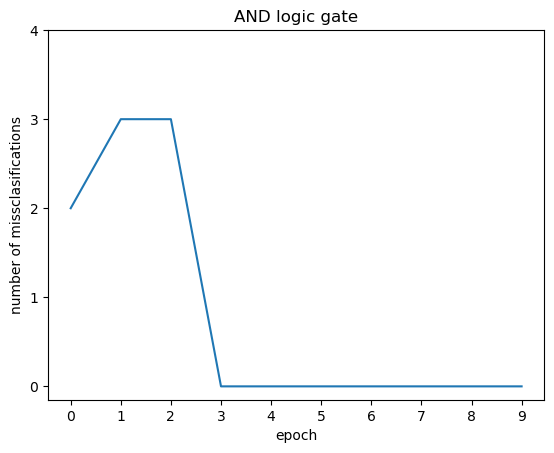

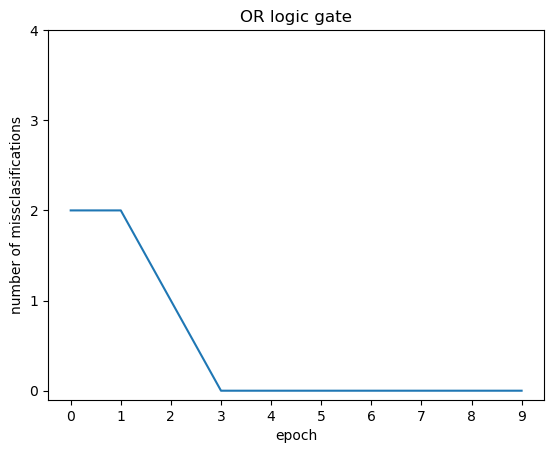

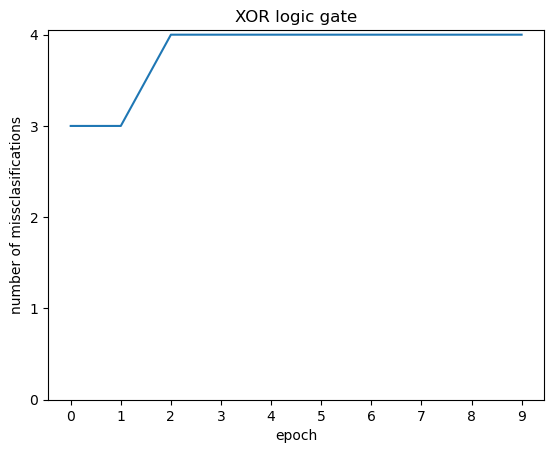

In [4]:
# THIS piece of code shows the error per epoch of the perceptron for each gate

for y_gate, title in zip([y_and_gate, y_or_gate, y_xor_gate], ["AND logic gate", "OR logic gate", "XOR logic gate"]):
    perceptron = Perceptron(learning_rate, n_epochs)
    gate_error = perceptron.train(X_gate, y_gate)
    plt.plot(gate_error)
    plt.xticks(np.arange(0, n_epochs, 1.0))
    plt.yticks(np.arange(0, 5, 1.0))
    plt.ylabel('number of missclasifications')
    plt.xlabel('epoch')
    plt.title(title)
    plt.show()

In [5]:
# testing softmax function
assert np.allclose(Activation().softmax(np.array([3.0, 1.0, 0.2])), np.array([0.8360188, 0.11314284, 0.05083836]))

assert np.allclose(Activation().softmax(np.array([[1, 2, 3], 
                                                  [2, 4, 8], 
                                                  [3, 5, 7],
                                                  [6, 6, 6]])), 
                                        np.array([[0.09003057, 0.24472847, 0.66524096],
                                                  [0.00242826, 0.01794253, 0.97962921],
                                                  [0.01587624, 0.11731043, 0.86681333],
                                                  [0.33333333, 0.33333333, 0.33333333]]))

In [6]:
features = pd.read_csv("../data/features.txt", sep = ',', header = None).to_numpy()
targets = pd.read_csv("../data/targets.txt", sep = ',', header = None).to_numpy()

In [7]:
x_train, x_test, x_val, y_train, y_test, y_val = train_test_val_split(features, targets, 0.6, 0.2)

In [8]:
print(features)

[[ 0.57855    0.82114    1.2148    ...  0.92471    0.24418    0.063001 ]
 [-0.022322   0.47681    0.55624   ...  1.0584     0.68453    0.99877  ]
 [ 0.057631   0.0017896  0.95442   ...  0.20707    0.40055    0.2335   ]
 ...
 [ 0.53833    0.16903    0.79056   ...  0.298      0.76012    1.2506   ]
 [ 0.73106    0.48718    0.64578   ...  0.78159    0.78677    0.48252  ]
 [ 1.1326     0.50078    0.93334   ...  0.58395    1.1942     0.61762  ]]


In [9]:
ann = ANN([10, 7], 1.0, [Activation(1.0, 0.1).LReLU, Activation().softmax], Loss().categorical_cross_entropy, number_of_features = 10)
for i in ann.weights:   print(i.shape)
ann.predict(features)

(11, 10)
(11, 7)


array([4, 4, 4, ..., 7, 5, 4], dtype=int64)

In [10]:
num_of_batches = 32

batches = create_mini_batches(x_train, y_train, num_of_batches)
print(batches)
print("Created: ", len(batches), " batches")
print(len(x_train) / num_of_batches)

Batch from:  0  to  7
Batch from:  7  to  14
Batch from:  14  to  21
Batch from:  21  to  28
Batch from:  28  to  35
Batch from:  35  to  42
Batch from:  42  to  49
Batch from:  49  to  56
Batch from:  56  to  63
Batch from:  63  to  70
Batch from:  70  to  77
Batch from:  77  to  84
Batch from:  84  to  91
Batch from:  91  to  98
Batch from:  98  to  105
Batch from:  105  to  112
Batch from:  112  to  119
Batch from:  119  to  126
Batch from:  126  to  133
Batch from:  133  to  140
Batch from:  140  to  147
Batch from:  147  to  154
Batch from:  154  to  161
Batch from:  161  to  168
Batch from:  168  to  175
Batch from:  175  to  182
Batch from:  182  to  189
Batch from:  189  to  196
Batch from:  196  to  203
Batch from:  203  to  210
Batch from:  210  to  217
Batch from:  217  to  224
Batch from:  224  to  231
Batch from:  231  to  238
Batch from:  238  to  245
Batch from:  245  to  252
Batch from:  252  to  259
Batch from:  259  to  266
Batch from:  266  to  273
Batch from:  273  